You are asked to answer each question by completing the code.
*   Please make sure that your code will work fine when the grader executes "Restart and run all"
*   Also make sure that your code won't output anything else but the result asked in the question

You can start with importing some useful libraries:

In [10]:
import numpy as np
import pandas as pd
import scipy.stats
from matplotlib import pyplot as plt

#1. Readmission Prediction for Healthcare System

The government is about to initiate the Hospital Readmissions Reduction Program (HRRP) under which hospitals receive a financial penalty if a patient comes back to the hospital within 30 days after discharge. In response, KAIST medical center is considering to introduce *CareTracker* program that helps reducing the probability of readmission through a combination of patient education and monitoring.

Your task is to establish a rule to decide per patient whether to provide CareTracker given patient information.
You are given a dataset that tells us which patients got readmitted within 30 days.


Please make sure to download "readmission.csv" file from KLMS and upload the file to the current Google colab session. You should be able to load the dataset using the following code:

In [2]:
data = pd.read_csv("readmission.csv")

The dataset contains information about 4382 medical cases: for each case, it contains the following information

*   `age`: patient's age
*   `female`: patient's gender
*   `flu_season`: whether the case was during the flu season
*   `ed_admit`: whether the case was an emergency admission
*   `severity_score`: the level of severity
*   `comorbidity_score`: the level of comorbidity
*   `readmit30`: whether the patient was readmitted within 30 days



In [3]:
data

,age,female,flu_season,ed_admit,severity_score,comorbidity_score,readmit30
0,100,1,1,1,38,112,0
1,83,1,0,1,8,109,1
2,74,0,1,0,1,80,0
3,66,1,1,1,25,4,0
4,68,1,1,1,25,32,0
...,...,...,...,...,...,...,...
4377,88,1,0,1,34,94,0
4378,98,0,0,1,51,136,0
4379,84,1,0,1,10,32,0
4380,67,1,1,1,10,73,0


You may have noticed that this is a classification task. Given the information about the patient, you have to predict whether the patient will be readmitted within 30 days (i.e., you have to predict the column *readmit30* using the other columns). As usual, we seprate the output variable *y* from the input variables *X* and divide the dataset into a training dataset *(X_train, y_train)* and a test dataset *(X_test, y_test)*:

In [4]:
X = data.drop( "readmit30", axis=1 )
y = data.readmit30

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=0)

#1.1 Classifier design & evaluation

**Your task here is to implement and test the following three classifiers**:

1.   *Severity-based classifier* that predicts a readmission if the value of *severity_score* exceeds a certain threshold.
2.   *Logistic classifier* that makes a prediction using the logistic model.
3.   *$k$-NN classifier* ($k=64$) that makes a prediction using $k$ nearest neighbors algorithm.

For each classifier, train the model using the training dataset (severity-based classifier does not need training) and evaluate its perforance using the test dataset in a form of ROC curve and AUC value:





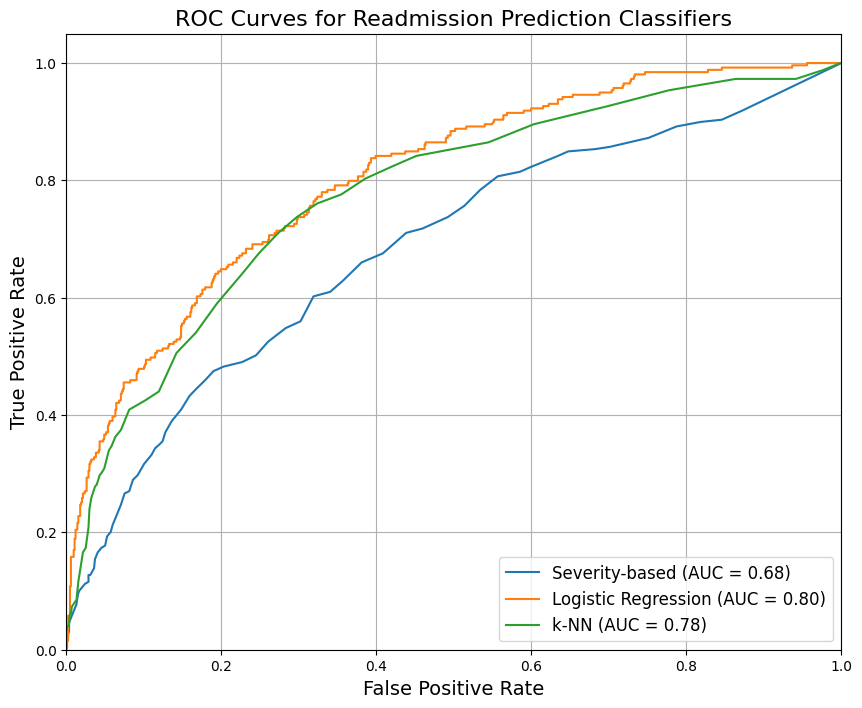

Severity-based classifier: AUC = 0.683165
Logistic classifier: AUC = 0.803778
k-NN classifier: AUC = 0.775485


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score

# IMPLEMENT YOUR CODE HERE
#   train three classifiers
#   plot ROC curves
#   compute AUC values

data = pd.read_csv("readmission.csv")

X = data.drop("readmit30", axis=1)
y = data.readmit30

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

plt.figure(figsize=(10, 8))

severity_scores = X_test['severity_score']

fpr_sev, tpr_sev, thresholds_sev = roc_curve(y_test, severity_scores)
auc_sev = roc_auc_score(y_test, severity_scores)

plt.plot(fpr_sev, tpr_sev, label=f'Severity-based (AUC = {auc_sev:.2f})')

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_probs_log = log_reg.predict_proba(X_test)[:, 1]

fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_probs_log)
auc_log = roc_auc_score(y_test, y_probs_log)

# Plot ROC curve
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')


knn = KNeighborsClassifier(n_neighbors=64)
knn.fit(X_train, y_train)

y_probs_knn = knn.predict_proba(X_test)[:, 1]

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_probs_knn)
auc_knn = roc_auc_score(y_test, y_probs_knn)

plt.plot(fpr_knn, tpr_knn, label=f'k-NN (AUC = {auc_knn:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for Readmission Prediction Classifiers', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()

# MODIFY THE FOLLOWING CODE
print( "Severity-based classifier: AUC = %f" % auc_sev )
print( "Logistic classifier: AUC = %f" % auc_log )
print( "k-NN classifier: AUC = %f" % auc_knn )

ROC curve plot should look like the following:

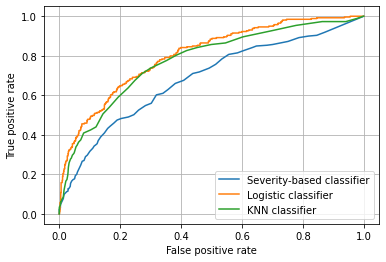

#1.2 Optimal thresholds

A pilot study on CareTracker shows that

*   CareTracker cost per patient: \$1,200
*   CareTracker reduces readmission probability by 40% (i.e., if 100 patients were readmitted without CareTracker, only 60 patients would be with CareTracker)
*   Penalty per readmitted patient imposed by Government: \$8,000

For example, if a patient is the one who will be readmitted without CareTracker, CareTracker can reduce the cost from \$8000 to \$6000 ($=\$1200+0.6 \times \$8000 $).

Note that a classifier immediately leads to a decision rule: CareTracker is provided to a patient if and only if the classifier predicts the patient will be readmitted without CareTracker.
**Your task here is to test decision rules induced by above classifiers and find out optimal threshold values.**
For each deicion rule, compute the total cost on the test dataset while varying the threshold value, and find out the optimal threshold at which the cost is minimized.

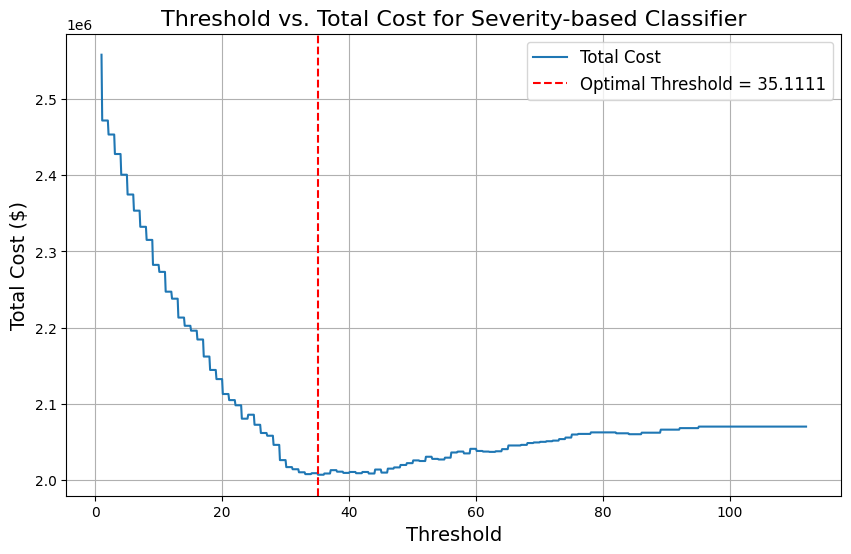

Severity-based classifier: minimum cost = 2006800.000000, optimal threshold = 35.111111


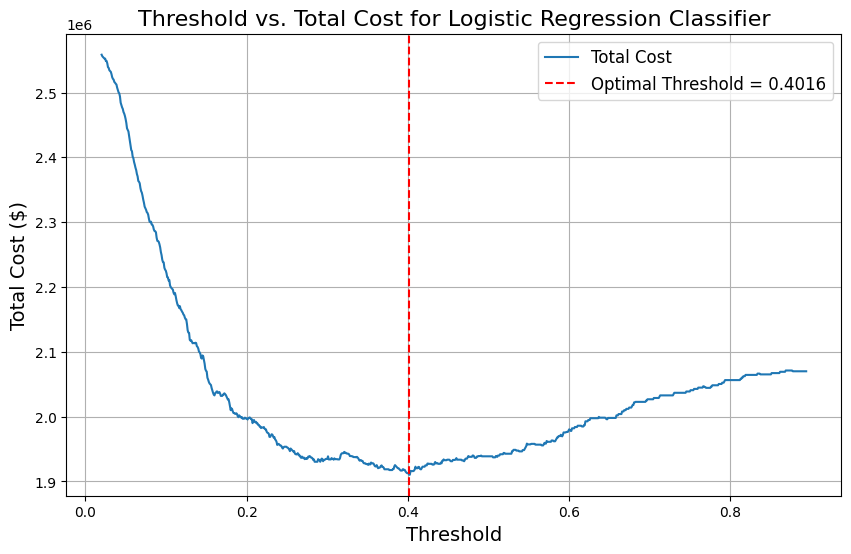

Logistic classifier: minimum cost = 1910400.000000, optimal threshold = 0.401603


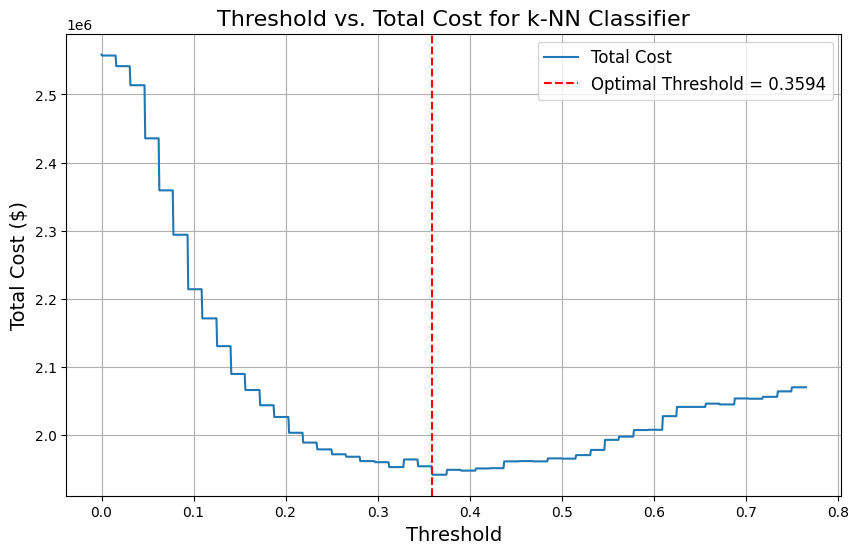

k-NN classifier: minimum cost = 1941600.000000, optimal threshold = 0.359438


In [14]:
# IMPLEMENT YOUR CODE HERE
#   for each of three classifiers, plot the threshold vs. total cost curve
#   draw a vertical line at the optimal threshold value

CARETRACKER_COST = 1200 
READMISSION_PENALTY = 8000  
REDUCED_PENALTY = 0.6 * READMISSION_PENALTY

def compute_total_cost(y_true, scores, threshold):

    provide_care = scores >= threshold
    
    num_care = provide_care.sum()
    
    num_no_care = len(scores) - num_care
    
    care_and_readmit = ((provide_care) & (y_true == 1)).sum()
    
    care_and_no_readmit = ((provide_care) & (y_true == 0)).sum()
    
    no_care_and_readmit = ((~provide_care) & (y_true == 1)).sum()
    
    no_care_and_no_readmit = ((~provide_care) & (y_true == 0)).sum()
    
    cost_care = num_care * CARETRACKER_COST
    cost_penalty_care = care_and_readmit * REDUCED_PENALTY
    cost_penalty_no_care = no_care_and_readmit * READMISSION_PENALTY
    
    total_cost = cost_care + cost_penalty_care + cost_penalty_no_care
    
    return total_cost

def find_optimal_threshold(y_true, scores, classifier_name):

    min_score = scores.min()
    max_score = scores.max()
    thresholds = np.linspace(min_score, max_score, 1000)

    costs = [compute_total_cost(y_true, scores, thresh) for thresh in thresholds]

    min_cost = min(costs)
    optimal_threshold = thresholds[costs.index(min_cost)]

    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, costs, label='Total Cost')
    plt.axvline(x=optimal_threshold, color='r', linestyle='--', 
                label=f'Optimal Threshold = {optimal_threshold:.4f}')
    plt.xlabel('Threshold', fontsize=14)
    plt.ylabel('Total Cost ($)', fontsize=14)
    plt.title(f'Threshold vs. Total Cost for {classifier_name}', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()
    
    return min_cost, optimal_threshold


# MODIFY THE FOLLOWING CODE

min_cost_sev, optimal_thresh_sev = find_optimal_threshold(y_test, severity_scores, "Severity-based Classifier")
print( "Severity-based classifier: minimum cost = %f, optimal threshold = %f" % (min_cost_sev, optimal_thresh_sev) )

min_cost_log, optimal_thresh_log = find_optimal_threshold(y_test, y_probs_log, "Logistic Regression Classifier")
print( "Logistic classifier: minimum cost = %f, optimal threshold = %f" % (min_cost_log, optimal_thresh_log) )

min_cost_knn, optimal_thresh_knn = find_optimal_threshold(y_test, y_probs_knn, "k-NN Classifier")
print( "k-NN classifier: minimum cost = %f, optimal threshold = %f" % (min_cost_knn, optimal_thresh_knn) )

Each of the plots should look like the following:

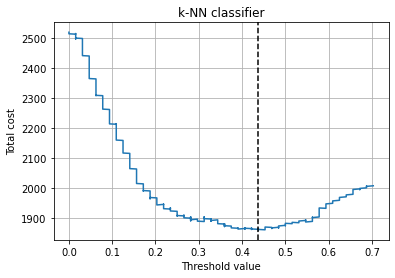

**(extra)** You might have noticed that the optimal threshold values are found around 40%. Can you explain why?

# 2. Contextual Newsvendor

We are selling orange juice on the street. It is well known that the daily demand is highly sensitive to the peak temperature of the day, and therefore we want to utilize the weather forecast to determine the order quantity (# of oranges to prepare).

 To identify this relationship, we collected observations for past $n$ days, and obtained a dataset $\{ (x_i, D_i) \}_{i=1}^n$ where $x_i$ is the forecasted temperature of day $i$, and $D_i$ is the (uncensored) demand of day $i$. This dataset is given in `sales.csv`, which is visualized below.

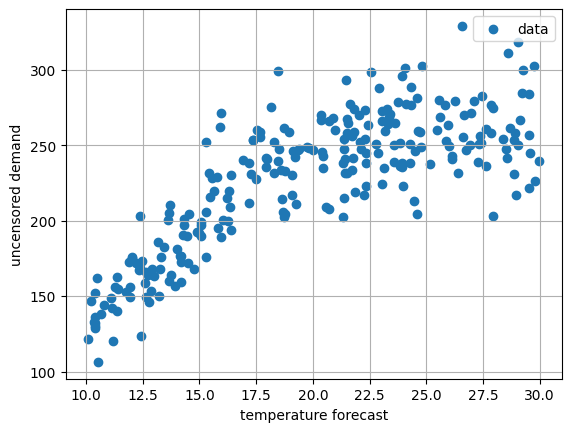

In [11]:
data = pd.read_csv( 'sales.csv' )
plt.scatter( data.x, data.D, label='data' )
plt.xlabel( "temperature forecast" )
plt.ylabel( "uncensored demand" )
plt.grid( True )
plt.legend( loc='best' )

Throughout this problem, we will restrict our attention to the log-linear model:
$$ D_i = \exp\left( \theta_b + \theta_m x_i + \epsilon_i \right), $$
where $(\theta_b, \theta_m) \in \mathbb{R}^2$ are the unknown model parameters to be estimated from the data, and $\epsilon_i$ is the unpredictable noise.
We assume that $\epsilon_i \sim \mathcal{N}(0, 0.1^2)$, indepedent of $x_i$.

If the parameters $(\theta_b, \theta_m)$ are known, the optimal ordering rule $q^\star(x)$ as a function of temperature forecast $x$ will be defined by
$$ q^\star(x; \theta_b, \theta_m) := \arg\min_{q \in \mathbb{R}} \mathbb{E}\left[ \left. \mathcal{L}(q,D) \right| x \right], \quad \mathcal{L}(q,D) := c (q-D)^+ + (p-c) (D-q)^+, $$
where $c$ is the order cost and $p$ is the sales price. It is not difficult to show that $q^\star(x)$ under the log-linear model above can be expressed as
$$ q^\star(x; \theta_b, \theta_m) = \exp\left( \theta_b + \theta_m x +  0.1 \times \Phi^{-1}\left( \frac{p-c}{p} \right) \right), $$
where $\Phi(\cdot)$ the cdf of standard normal distribution. We assume that $c=1$ and $p=5$, and then $q^\star(x; \theta_a, \theta_b)$ can be implemented as follows:

In [20]:
order_cost, sales_price = 1.0, 5.0
offset = 0.1*scipy.stats.norm.ppf( (sales_price-order_cost)/sales_price )

def optimal_order_quantity( temperature_forecast, theta_b, theta_m ):
  return np.exp( theta_b + theta_m*temperature_forecast + offset )

##2-1. Predict-then-optimize with MLE

We first consider a naive "estimate-then-optimize" approach. **Complete the function `MLE()`** that estimates the parameters $(\theta_b, \theta_m)$ using maximum likelihood estimation, i.e.,
$$ (\hat{\theta}_b, \hat{\theta}_m) \gets \arg\min_{(\theta_b, \theta_m)} \sum_{i=1}^n \left( \log(D_i) - (\theta_b + \theta_m x_i) \right)^2. $$


* The input arguments `temperature_forecasts` and `uncensored_demands` are lists of $n$ floating numbers, representing $x_i$'s and $D_i$'s, respectively.
* The return value should be a tuple $(\hat{\theta}_b, \hat{\theta}_m)$.

You can import any numerical optimization modules such as `scipy.optimize`.

In [38]:
from scipy.optimize import minimize

def MLE(temperature_forecasts, uncensored_demands):

    x = np.array(temperature_forecasts)
    D = np.array(uncensored_demands)

    log_D = np.log(D)

    def objective(params):
        theta_b, theta_m = params
        predictions = theta_b + theta_m * x
        residuals = log_D - predictions
        return np.sum(residuals ** 2)

    initial_guess = [0.0, 0.0]

    result = minimize(objective, initial_guess, method='BFGS')

    if not result.success:
        raise RuntimeError("Optimization failed: " + result.message)

    theta_b_hat, theta_m_hat = result.x

    return (theta_b_hat, theta_m_hat)


Your code will be evaluated according to the procedure like below:

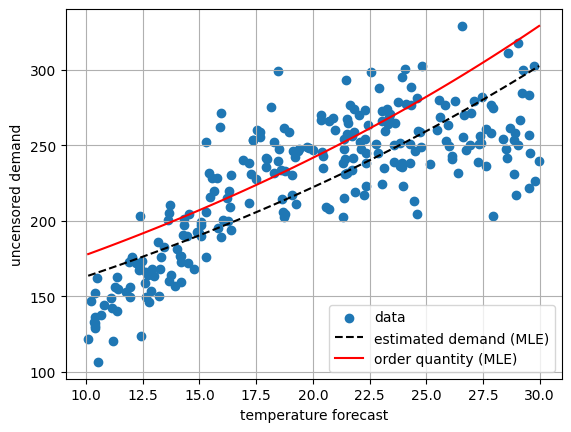

In [42]:
data = pd.read_csv( 'sales.csv' )
plt.scatter( data.x, data.D, label='data' )
plt.xlabel( "temperature forecast" )
plt.ylabel( "uncensored demand" )
plt.grid( True )

MLE_theta_b, MLE_theta_m = MLE( list(data.x), list(data.D) )

xs = np.linspace( data.x.min(), data.x.max(), 100 )
plt.plot( xs, np.exp( MLE_theta_b + MLE_theta_m*xs ), '--', c='k', label='estimated demand (MLE)' )
plt.plot( xs, optimal_order_quantity( xs, MLE_theta_b, MLE_theta_m ), '-', c='r', label='order quantity (MLE)' )
plt.legend( loc='best' )

#2-2. Decision-focused Learning

We now consider the decision-aware learning approach. **Complete the function `DFL()`** that estimates the parameters $(\theta_b, \theta_m)$ by solving the following minimization problem:
$$ (\hat{\theta}_b, \hat{\theta}_m) \gets \arg\min_{(\theta_b, \theta_m)} \sum_{i=1}^n \mathcal{L}\left( q^\star(x_i; \theta_b, \theta_m), D_i \right). $$

* The specification of all input arguments are identical to P4-1.
* The return value should be a tuple $(\hat{\theta}_b, \hat{\theta}_m)$.

You can import any numerical optimization modules such as `scipy.optimize`.

In [45]:
from scipy.optimize import minimize
from scipy.stats import norm

def DFL(temperature_forecasts, uncensored_demands):

    x = np.array(temperature_forecasts)
    D = np.array(uncensored_demands)

    order_cost = 1.0 
    sales_price = 5.0 

    service_level = (sales_price - order_cost) / sales_price
    offset = 0.1 * norm.ppf(service_level) 

    def optimal_order_quantity(x_i, theta_b, theta_m):
        return np.exp(theta_b + theta_m * x_i + offset)

    # Define the loss function L(q, D)
    def loss(q, D_i):
        return order_cost * max(q - D_i, 0) + (sales_price - order_cost) * max(D_i - q, 0)

    vectorized_loss = np.vectorize(loss)

    def objective(params):
        theta_b, theta_m = params
        q_star = optimal_order_quantity(x, theta_b, theta_m)
        # Compute loss for each data point
        losses = vectorized_loss(q_star, D)
        total_loss = np.sum(losses)
        return total_loss

    initial_guess = [0.0, 0.0]

    result = minimize(objective, initial_guess, method='BFGS')

    theta_b_hat, theta_m_hat = result.x

    return (theta_b_hat, theta_m_hat)


Your code will be evaluated according to the procedure like below:

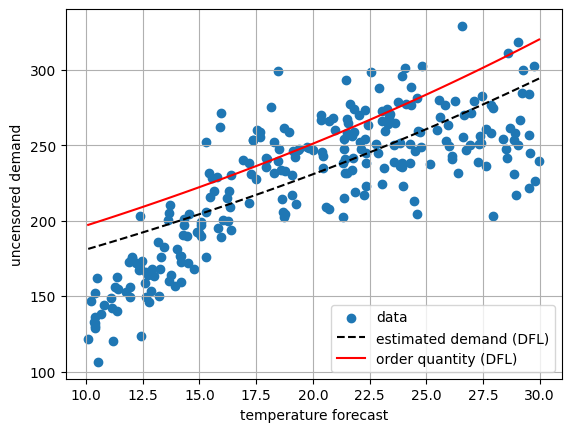

In [46]:
data = pd.read_csv( 'sales.csv' )
plt.scatter( data.x, data.D, label='data' )
plt.xlabel( "temperature forecast" )
plt.ylabel( "uncensored demand" )
plt.grid( True )

DFL_theta_b, DFL_theta_m = DFL( list(data.x), list(data.D) )

xs = np.linspace( data.x.min(), data.x.max(), 100 )
plt.plot( xs, np.exp( DFL_theta_b + DFL_theta_m*xs ), '--', c='k', label='estimated demand (DFL)' )
plt.plot( xs, optimal_order_quantity( xs, DFL_theta_b, DFL_theta_m ), '-', c='r', label='order quantity (DFL)' )
plt.legend( loc='best' )